In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 

In [2]:
df=pd.read_csv('twitter_validation.csv',encoding='ISO-8859-1',header=None)
df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
df.columns=['Id','Social media','Target','Reviews']
df

,Id,Social media,Target,Reviews
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,Id,Social media,Target,Reviews
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,Id,Social media,Target,Reviews
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.dtypes

Id               int64
Social media    object
Target          object
Reviews         object
dtype: object

In [7]:
df.isna().sum()

Id              0
Social media    0
Target          0
Reviews         0
dtype: int64

In [8]:
df1=df['Social media'].value_counts()
df1

Social media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
PlayerUnknownsBattlegrounds(PUBG)    38
FIFA                                 38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Facebook                             33
Verizon                              32
Hearthstone                          32
Overwatch                            32
CS-GO                                32
CallOfDuty                           31
WorldOfCraft                         30
Cyberpunk2077                        30
MaddenNFL                            29
Microsoft                            28
Dota2                      

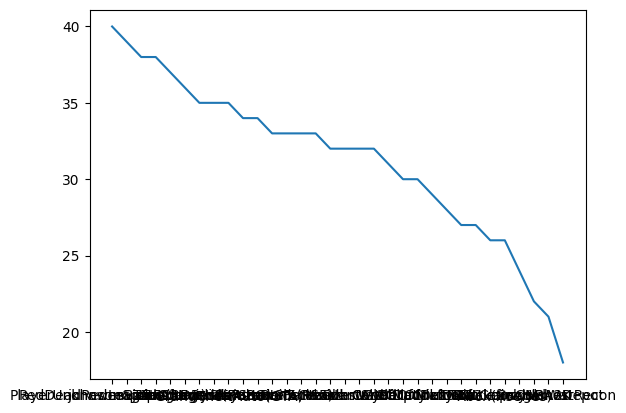

In [9]:
plt.plot(df1.index,df1.values)

In [10]:
df2=df['Target'].value_counts()

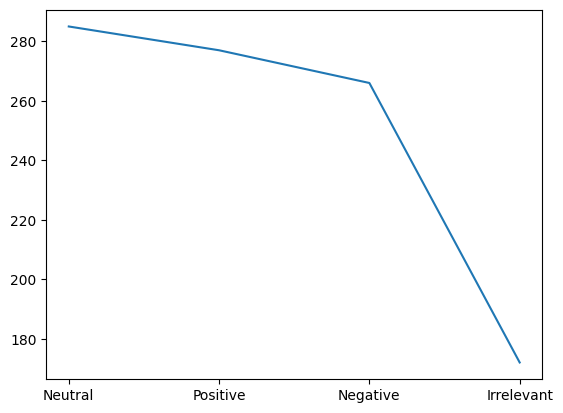

In [11]:
plt.plot(df2.index,df2.values)

In [12]:
# remove row from coloumn
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)
df

,Id,Social media,Target,Reviews
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
df.shape

(828, 4)

In [14]:
df.reset_index(drop=True,inplace=True)
df

,Id,Social media,Target,Reviews
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df.drop(['Id','Social media'],axis=1,inplace=True)
df

,Target,Reviews
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
# df['Target']=df['Target'].str.replace('Positive','1')
# df['Target']=df['Target'].str.replace('Negative','-1')
# df['Target']=df['Target'].str.replace('Neutral','0')
df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,Target,Reviews
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [17]:
tweets=df.Reviews
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Reviews, Length: 828, dtype: object

In [18]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x)) #apply ==>keyword used in lambda join(spa+word)
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Reviews, Length: 828, dtype: object

In [19]:
#remove special characters
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True) #negotiation regular expression
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: Reviews, Length: 828, dtype: object

In [20]:
# remove words less than 3 characters ==> for easy process
tweets=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweets


0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: Reviews, Length: 828, dtype: object

In [21]:
from nltk.stem import SnowballStemmer
sp=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[sp.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: Reviews, Length: 828, dtype: object

In [22]:
from nltk.corpus import stopwords
st=stopwords.words('english')
tweets=tweets.apply(lambda x:' '.join([i for i in tk.tokenize(x) if i not in st]))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: Reviews, Length: 828, dtype: object

In [23]:
# Vectorization
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>

In [24]:
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>
  Coords	Values
  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.25069214907989

In [25]:
y=df['Target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7222 stored elements and shape (579, 3763)>

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
from sklearn.naive_bayes import BernoulliNB
nav=BernoulliNB()
from sklearn.svm import SVC
sup=SVC()
from sklearn.metrics import confusion_matrix,classification_report
lst=[knn,nav,sup]

In [28]:
print(lst)

[KNeighborsClassifier(n_neighbors=7), BernoulliNB(), SVC()]


In [29]:
for s in lst:
    s.fit(x_train,y_train)
    y_pred=s.predict(x_test)
    print('Model is',s)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

Model is KNeighborsClassifier(n_neighbors=7)
[[56 14  9]
 [34 32 13]
 [45 17 29]]
              precision    recall  f1-score   support

          -1       0.41      0.71      0.52        79
           0       0.51      0.41      0.45        79
           1       0.57      0.32      0.41        91

    accuracy                           0.47       249
   macro avg       0.50      0.48      0.46       249
weighted avg       0.50      0.47      0.46       249

Model is BernoulliNB()
[[53  7 19]
 [15 29 35]
 [22  7 62]]
              precision    recall  f1-score   support

          -1       0.59      0.67      0.63        79
           0       0.67      0.37      0.48        79
           1       0.53      0.68      0.60        91

    accuracy                           0.58       249
   macro avg       0.60      0.57      0.57       249
weighted avg       0.60      0.58      0.57       249

Model is SVC()
[[40 34  5]
 [ 9 60 10]
 [11 36 44]]
              precision    recall  f1-score 